In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("NOMURA_PROJECT/Nomura_Global_Equity_Fund.csv")
Data = Data.drop(['Unnamed: 0'], axis=1)

In [3]:
## get return
dailyReturn = Data['Price'].pct_change()*100

In [5]:
## 每季報酬率的標準差
date_split = []
temp = Data['Date']
for i in range(Data['Date'].size):
    date_split.append(temp[i].split('/'))

new_Data = pd.DataFrame(date_split, columns = ['Year', 'Month', 'Day'])

season = {'s1':['01', '02', '03'], 's2':['04', '05', '06'], 's3':['07', '08', '09'], 's4':['10', '11', '12']}   
seasonal = []
for j in range(new_Data['Month'].size):
    if new_Data['Month'][j] in season['s1']:
        seasonal.append('s1')
    elif new_Data['Month'][j] in season['s2']:
        seasonal.append('s2')
    elif new_Data['Month'][j] in season['s3']:
        seasonal.append('s3')
    elif new_Data['Month'][j] in season['s4']:
        seasonal.append('s4')
new_Data['Seasonal'] = seasonal

dailyReturn = Data['Price'].pct_change()*100
new_Data['DailyReturn_std'] = dailyReturn

In [6]:
Seasonal_std_df = new_Data.groupby(['Year', 'Seasonal']).std(ddof=0)
Seasonal_std_df

DailyReturn_std
Year Seasonal                 
1997 s1               1.253339
     s2               0.528231
     s3               1.345190
     s4               1.126471
1998 s1               1.192455
     s2               0.878415
     s3               1.197551
     s4               1.463324
1999 s1               1.353158
     s2               0.786994
     s3               0.669950
     s4               1.010758
2000 s1               1.713400
     s2               1.333203
     s3               0.889565
     s4               1.309119
2001 s1               2.002611
     s2               1.143833
     s3               1.237745
     s4               0.937490
2002 s1               0.963745
     s2               0.994602
     s3               1.831770
     s4               1.299441
2003 s1               1.279501
     s2               0.885200
     s3               0.717562
     s4               0.577717
2004 s1               0.644576
     s2               0.656089
...                        ...
2013 s1               0.666606
     s2               0.789733
     s3               0.483509
     s4               0.533169
2014 s1               0.601685
     s2               0.427989
     s3               0.501714
     s4               0.801585
2015 s1               0.790392
     s2               0.567224
     s3               1.161128
     s4               0.780963
2016 s1               0.948005
     s2               0.781736
     s3               0.534031
     s4               0.557481
2017 s1               0.447561
     s2               0.545130
     s3               0.547697
     s4               0.506438
2018 s1               1.217809
     s2               0.684768
     s3               0.519616
     s4               1.336931
2019 s1               0.769924
     s2               0.718286
     s3               0.814884
     s4               0.574938
2020 s1               2.979827
     s2               2.987675

[94 rows x 1 columns]

(array([1.10022532, 1.26322167, 0.40749086, 0.73348355, 0.08149817,
        0.08149817, 0.04074909, 0.        , 0.04074909, 0.08149817]),
 array([0.37699104, 0.63805942, 0.8991278 , 1.16019618, 1.42126456,
        1.68233294, 1.94340132, 2.2044697 , 2.46553808, 2.72660646,
        2.98767484]),
 <a list of 10 Patch objects>)

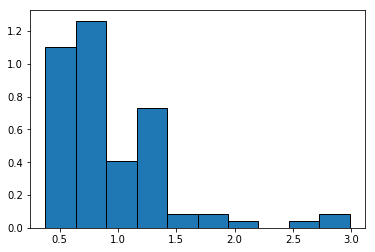

In [7]:
plt.hist(Seasonal_std_df['DailyReturn_std'], bins=10, edgecolor="black", density=True)